## Loading dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import string

df = pd.read_csv(r"Copy of user_review.csv")
print(df.head())

   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.


## Cleaning

In [12]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop(columns=['id'], inplace=True)
print(df.head())
# There wasn't anything to clean as the nothign was dropped or to say no null values were found

id        0
review    0
dtype: int64
                                              review
0  I love this app! It is so useful and easy to use.
1  Terrible experience. The app crashes all the t...
2        Decent app but needs improvement in the UI.
3           Fantastic! This app has changed my life.
4       The app is okay, but it lacks many features.


## Basic text processing

In [13]:
def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['review'] = df['review'].apply(preprocess_text)
print(df.head())


                                             review
0   i love this app it is so useful and easy to use
1  terrible experience the app crashes all the time
2        decent app but needs improvement in the ui
3            fantastic this app has changed my life
4        the app is okay but it lacks many features


## Sentiment Analysis

In [17]:
def get_sentiment(text):
    # Perform sentiment analysis
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['review'].apply(get_sentiment)
print(df.head())


                                             review sentiment
0   i love this app it is so useful and easy to use  positive
1  terrible experience the app crashes all the time  negative
2        decent app but needs improvement in the ui  positive
3            fantastic this app has changed my life  positive
4        the app is okay but it lacks many features  positive


In [18]:
# Filter and display negative feedback
negative_feedback = df[df['sentiment'] == 'negative']

# Print the negative feedback
print("Negative Feedback:")
print(negative_feedback)


Negative Feedback:
                                               review sentiment
1    terrible experience the app crashes all the time  negative
5                   worst app ever it is full of bugs  negative
9           the app is slow and unresponsive at times  negative
11  i had a bad experience the customer support is...  negative
15     disappointed the app doesnt work as advertised  negative
21           the interface is cluttered and confusing  negative
26                not worth the money i want a refund  negative
42              not intuitive at all very complicated  negative
48                     i wouldnâ€™t use any other app  negative
49                      the app could use a dark mode  negative


## Summary

sentiment
positive    32
negative    10
neutral      8
Name: count, dtype: int64


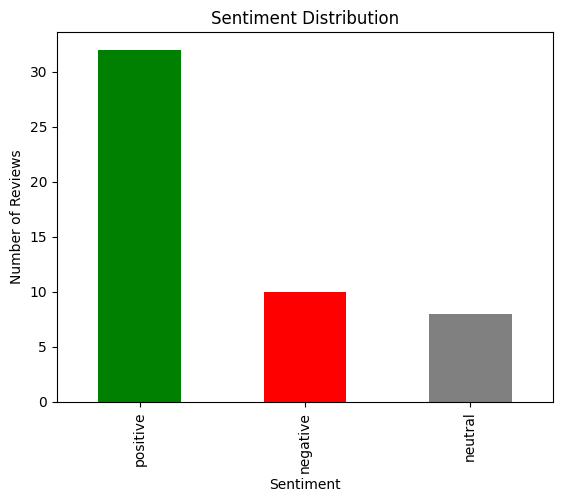

In [15]:
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## Reviewing Negative Feedbacks

In [1]:
### import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data files are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df['review'] = df['review'].apply(preprocess_text)

# Preprocess text for keyword extraction
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalpha()]
    return filtered_tokens

negative_feedback['tokens'] = negative_feedback['review'].apply(tokenize_and_filter)

# Extract keywords
all_words = [word for tokens in negative_feedback['tokens'] for word in tokens]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Get the 20 most common words
print("Most common words in negative feedback:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Optionally, created a word cloud for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'nltk'